In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
#mouse_metadata.merge(study_results,)
# Display the data table for preview
merged_data = pd.merge(mouse_metadata, study_results)

In [2]:
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
#Finding the duplicated mouse and removing it from the data set.

dupes = merged_data.loc[merged_data.duplicated(["Mouse ID", "Timepoint"]),"Mouse ID"].unique()

dupe_df = merged_data.loc[merged_data["Mouse ID"] == "g989"].index

clean_data = merged_data.drop(dupe_df)

In [4]:
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [14]:
#Finding the amount of mice in the studies.

Mice = clean_data["Mouse ID"].nunique()
print("The total number of mice in the studies is: " + str(Mice))

The total number of mice in the studies is: 248


In [15]:
# This generates summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each drug using a groupby.
group = clean_data.groupby("Drug Regimen")

DF_summary = round(group["Tumor Volume (mm3)"].mean(),2).to_frame()

DF_summary["Median"] = round(group["Tumor Volume (mm3)"].median(),2).to_frame()

DF_summary["Variance"] = round(group["Tumor Volume (mm3)"].var(),2).to_frame()

DF_summary["Standard deviation"] = round(group["Tumor Volume (mm3)"].std(),2).to_frame()

DF_summary.rename(columns={'Tumor Volume (mm3)': 'Mean'}, inplace=True)

In [16]:
DF_summary

,Mean,Median,Variance,Standard deviation
Drug Regimen,,,,
Capomulin,40.68,41.56,24.95,4.99
Ceftamin,52.59,51.78,39.29,6.27
Infubinol,52.88,51.82,43.13,6.57
Ketapril,55.24,53.70,68.55,8.28
Naftisol,54.33,52.51,66.17,8.13
Placebo,54.03,52.29,61.17,7.82
Propriva,52.32,50.45,43.85,6.62
Ramicane,40.22,40.67,23.49,4.85
Stelasyn,54.23,52.43,59.45,7.71


Text(0.5, 1.0, 'Number of Mice per Treatment')

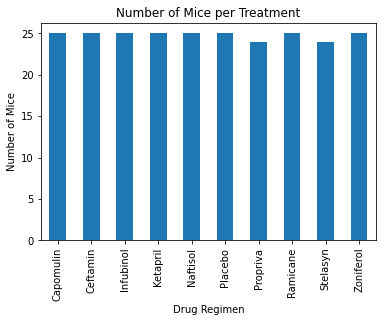

In [17]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

Number_mice = clean_data.groupby("Drug Regimen").nunique()

Number_mice_df = Number_mice["Mouse ID"].to_frame()

Mice_bar = Number_mice_df.plot.bar(legend=False)

Mice_bar.set_xlabel("Drug Regimen")

Mice_bar.set_ylabel("Number of Mice")

Mice_bar.set_title("Number of Mice per Treatment")


Text(0.5, 1.0, 'Number of Mice per Treatment')

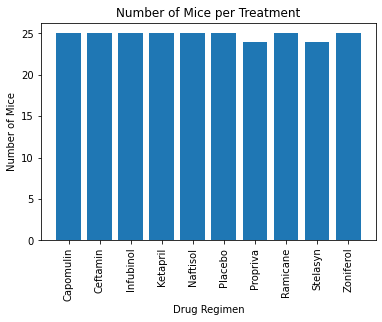

In [33]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x= Number_mice_df.index
plt.bar(x, Number_mice_df["Mouse ID"], alpha=1, align="center")
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")

Text(0.5, 1.0, 'Distribution of Sexes')

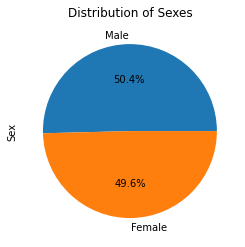

In [30]:
# Creates a Piechart showing the distribution of sexes in the studies with pandas.
Sex = clean_data[["Mouse ID","Sex"]].drop_duplicates()

Sex_distribution = Sex["Sex"].value_counts()

Sex_distribution.plot.pie(autopct="%1.1f%%")
plt.title("Distribution of Sexes")

Text(0.5, 1.0, 'Distribution of Sexes')

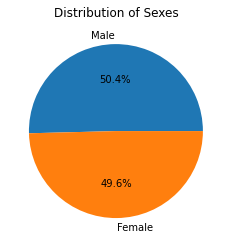

In [29]:
# Creates a Piechart showing the distribution of sexes in the studies with pyplot.
labels=["Male",'Female']
Values = Sex_distribution
plt.pie(Values, labels = labels, autopct="%1.1f%%")
plt.title("Distribution of Sexes")


In [35]:
#Finding the last timepoints of each mouse first for all the drug regimen then dropping the studies that aren't relevant to the data.
Last_timepoint = clean_data.drop_duplicates(['Mouse ID'],keep="last")

Drugs_to_drop = ["Zoniferol","Placebo","Naftisol",'Ketapril','Propriva','Stelasyn']

Cleaned_timepoint = Last_timepoint.loc[~Last_timepoint["Drug Regimen"].isin(Drugs_to_drop)]

Cleaned_timepoint = Cleaned_timepoint.sort_values(by=['Drug Regimen'])

Cleaned_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
317,j246,Capomulin,Female,21,21,35,38.753265,1
350,v923,Capomulin,Female,19,21,45,40.658124,2
340,w150,Capomulin,Male,23,23,10,39.952347,0
337,j119,Capomulin,Female,7,23,45,38.125164,1
380,l509,Capomulin,Male,17,21,45,41.483008,3
...,...,...,...,...,...,...,...,...
447,r921,Ramicane,Female,5,25,30,43.419381,1
449,w678,Ramicane,Female,5,24,5,43.166373,0
453,y449,Ramicane,Male,19,24,15,44.183451,0
234,r811,Ramicane,Male,9,19,45,37.225650,1


In [39]:
#Calculating quartiles,IQR,Median and potential outliers and appending the data to a list for making box plots.

List_of_Tumor = []

Treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

for t in Treatments:
    IQR_test = Last_timepoint['Tumor Volume (mm3)'].loc[Last_timepoint["Drug Regimen"]==t]
    
    IQR_list = IQR_test.quantile([0.25,0.5,0.75])
    
    Q1 = IQR_list[0.25]
    
    Q3 = IQR_list[0.75]
    
    IQR = (Q3-Q1)

    lower_bound = IQR_list[0.25] - (1.5*IQR)
    
    upper_bound = IQR_list[0.75] + (1.5*IQR)
    
    List_of_Tumor.append(IQR_test)
    
    print(f"The lower quartile of {t} is: {Q1}")
    print(f"The upper quartile of {t} is: {Q3}")
    print(f"The interquartile range of {t} is: {IQR}")
    print(f"The the median of {t} is: {IQR_list[0.5]} ")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print("-----------------------------------------------------")

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
-----------------------------------------------------
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
-----------------------------------------------------
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
--------

Text(0, 0.5, 'Tumor Volume')

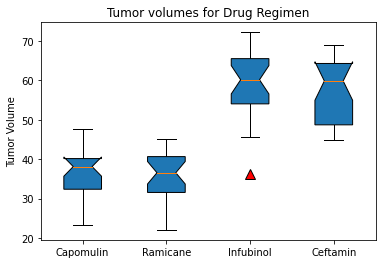

In [53]:
#Creates a boxplot with the above list and changes some of the properties to show outlier in a different colour etc.
plt.boxplot(List_of_Tumor,notch=True, patch_artist=True,flierprops={'marker': '^', 'markersize': 10, 'markerfacecolor': 'Red'})

plt.title("Tumor volumes for Drug Regimen")

plt.xticks([1, 2, 3,4], Treatments)

plt.ylabel("Tumor Volume")

Text(0.5, 1.0, 'Tumor Size Over Time')

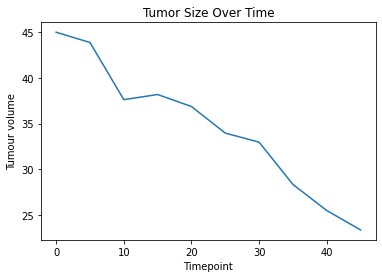

In [60]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capo_drug_data = clean_data.loc[clean_data["Drug Regimen"]=="Capomulin"]

Single_mouse = Capo_drug_data.loc[Capo_drug_data["Mouse ID"]=="s185"]

Single_mouse_plot_x = Single_mouse['Timepoint']

Single_mouse_plot_y = Single_mouse['Tumor Volume (mm3)']

plt.plot(Single_mouse_plot_x,Single_mouse_plot_y)

plt.xlabel("Timepoint")
plt.ylabel("Tumour volume")
plt.title("Tumor Size Over Time")

Text(0.5, 1.0, 'Mouse Weight vs Average Tumor Volume')

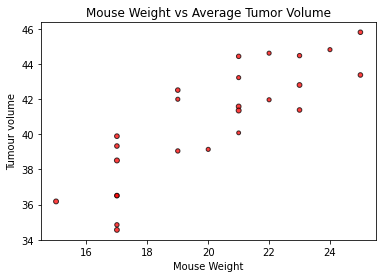

In [62]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Sort_tumor = round(Mean_Tumors.sort_values(by=['Mouse ID']),2)

weight = Capo_group["Weight (g)"].to_frame()

weight.sort_values(by=["Mouse ID"])


Capo_group = Capo_drug_data.groupby("Mouse ID").mean()

Mean_Tumors = Capo_group["Tumor Volume (mm3)"].to_frame()

Capo_clean = Capo_drug_data.drop_duplicates(["Mouse ID"], keep= "first")

Mouse_weight = Capo_clean["Weight (g)"].to_frame()

plt.scatter(weight,Sort_tumor,marker="o", facecolors="red", edgecolors="black",
            s=Mouse_weight, alpha=0.75)

plt.xlabel("Mouse Weight")
plt.ylabel("Tumour volume")
plt.title("Mouse Weight vs Average Tumor Volume")

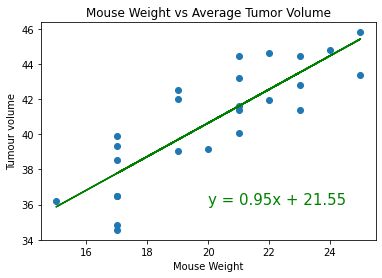

In [65]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_val = Capo_group["Weight (g)"]
y_val = Capo_group["Tumor Volume (mm3)"]

slope, intercept, regress, p, std_err = st.linregress(x_val,y_val)

regress_values = x_val * slope + intercept

Equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_val,y_val)

plt.plot(x_val,regress_values,"g-")

plt.xlabel("Mouse Weight")

plt.ylabel("Tumour volume")

plt.title("Mouse Weight vs Average Tumor Volume")

plt.annotate(Equation,(20,36),fontsize=15,color="green")

plt.show()

